In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('/content/sample_data/twitter_validation.csv')
df

,id,Facebook,Irrelevant,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
text_df = df.drop(['id','Facebook','Irrelevant'], axis=1)
text_df.head()

,text
0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,@Microsoft Why do I pay for WORD when it funct...
2,"CSGO matchmaking is so full of closet hacking,..."
3,Now the President is slapping Americans in the...
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
text_df = text_df.drop_duplicates('text')

In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
text_df['polarity'] = text_df['text'].apply(polarity)
text_df.head(50)

,text,polarity
0,BBC News - Amazon boss Jeff Bezos rejects clai...,0.000000
1,@Microsoft Why do I pay for WORD when it funct...,-0.400000
2,"CSGO matchmaking is so full of closet hacking,...",-0.350000
3,Now the President is slapping Americans in the...,0.250000
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...,-0.218750
5,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...,0.213068
6,"Rocket League, Sea of Thieves or Rainbow Six: ...",0.750000
7,my ass still knee-deep in Assassins Creed Odys...,0.600000
8,FIX IT JESUS ! Please FIX IT ! What In the wor...,-0.300000
9,The professional dota 2 scene is fucking explo...,0.100000


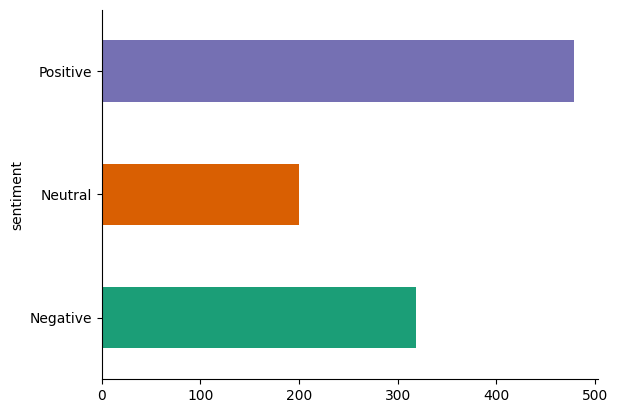

In [ ]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
text_df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"
text_df['sentiment'] = text_df['polarity'].apply(sentiment)
text_df.head()

<ipython-input-20-7ba6a433da5c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(text_df, x='polarity', y='sentiment', inner='box', palette='Dark2')


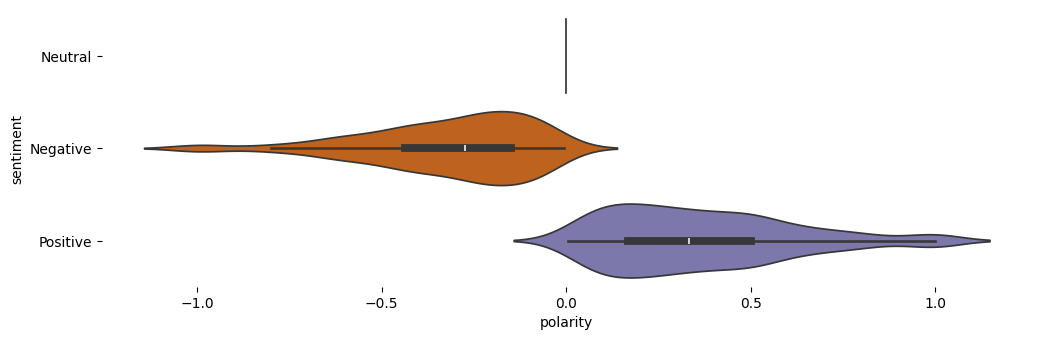

In [ ]:
# @title sentiment vs polarity

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(text_df['sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(text_df, x='polarity', y='sentiment', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

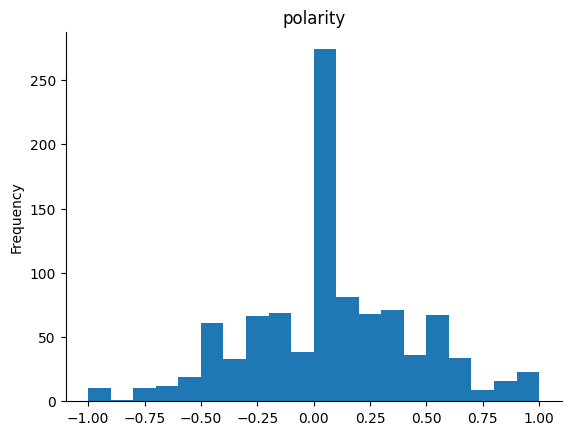

In [ ]:
# @title polarity

from matplotlib import pyplot as plt
text_df['polarity'].plot(kind='hist', bins=20, title='polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)